In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [4]:
df = pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')

In [5]:
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

###### 1) What is the distribution of age among heart failure patients in the dataset

In [13]:
df['age'].describeribe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [22]:
df_died = df[df['DEATH_EVENT']==1]

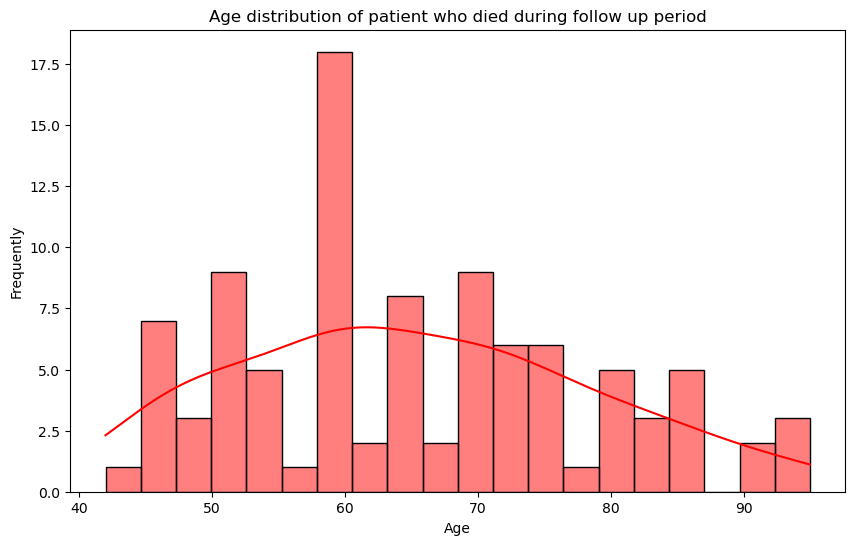

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df_died['age'],bins=20,kde=True,color='red')
plt.title('Age distribution of patient who died during follow up period')
plt.xlabel('Age')
plt.ylabel('Frequently')
plt.show()

##### 2) How does the death rate vary with age?

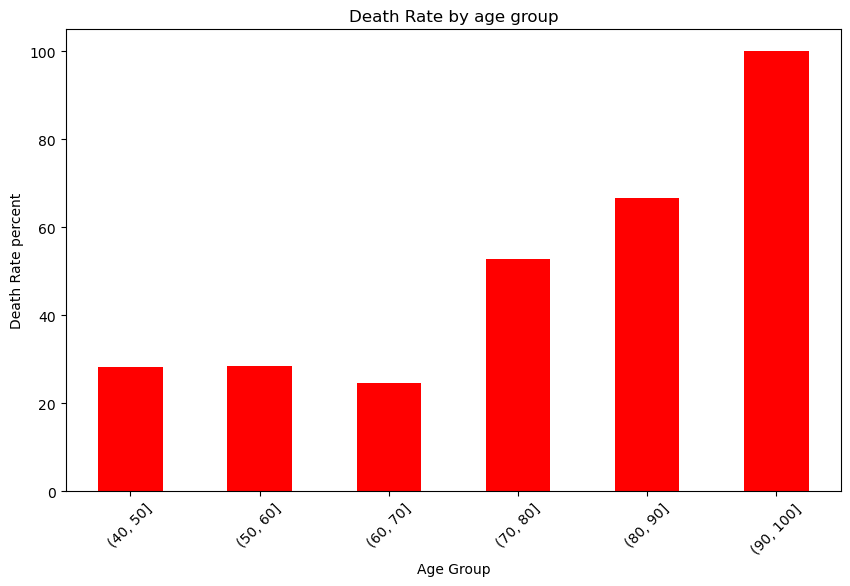

In [26]:
bins = [40,50,60,70,80,90,100]
df['age_group'] = pd.cut(df['age'],bins)

death_rate_by_age = df.groupby('age_group')['DEATH_EVENT'].mean()*100

plt.figure(figsize=(10,6))
death_rate_by_age.plot(kind='bar',color='red')
plt.title('Death Rate by age group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate percent')
plt.xticks(rotation=45)
plt.show()

##### 3) What is the percentage of male and female patients in the dataset?


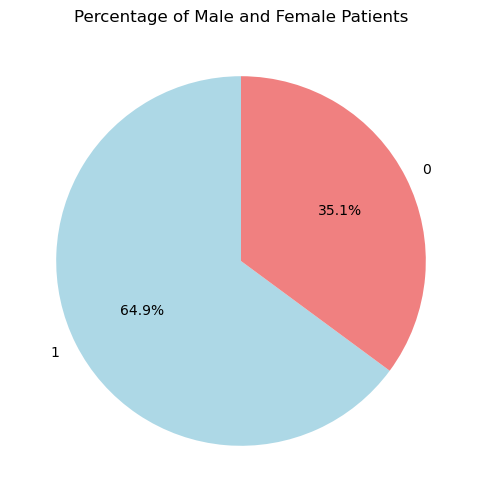

In [36]:
gender_count = df['sex'].value_counts(normalize=True)*100
plt.figure(figsize=(8, 6))
gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Percentage of Male and Female Patients')
plt.ylabel('')
plt.show()

##### 4) How does the platelet count vary among different age groups?


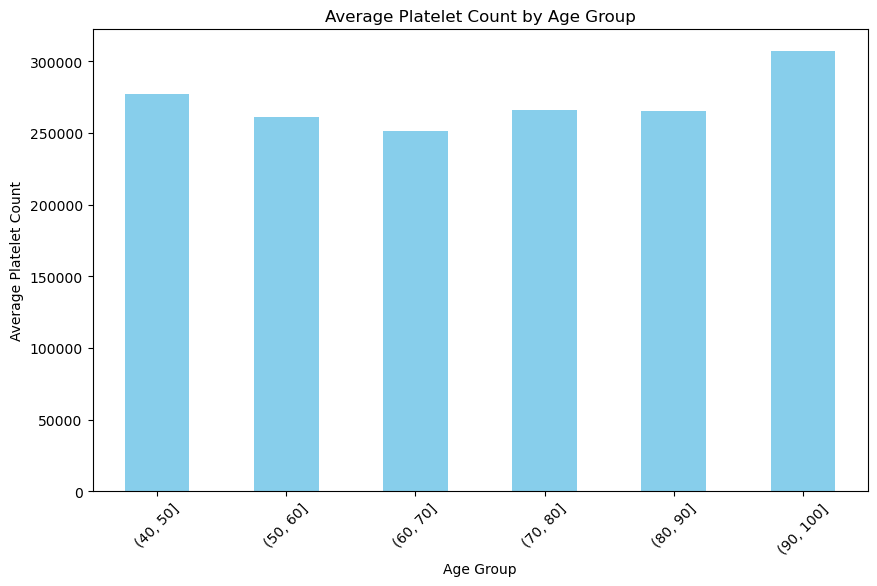

In [38]:
# Bin ages into intervals (you can adjust the bin size if needed)
bins = [40, 50, 60, 70, 80, 90, 100]
df['age_group'] = pd.cut(df['age'], bins)

# Calculate average platelet count for each age group
platelet_count_by_age = df.groupby('age_group')['platelets'].mean()

# Plotting the variation of platelet count among different age groups
plt.figure(figsize=(10, 6))
platelet_count_by_age.plot(kind='bar', color='skyblue')
plt.title('Average Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Platelet Count')
plt.xticks(rotation=45)
plt.show()


##### 5) Is there a correlation between creatinine and sodium levels in the blood?


Correlation coefficient between creatinine and sodium levels: 0.06


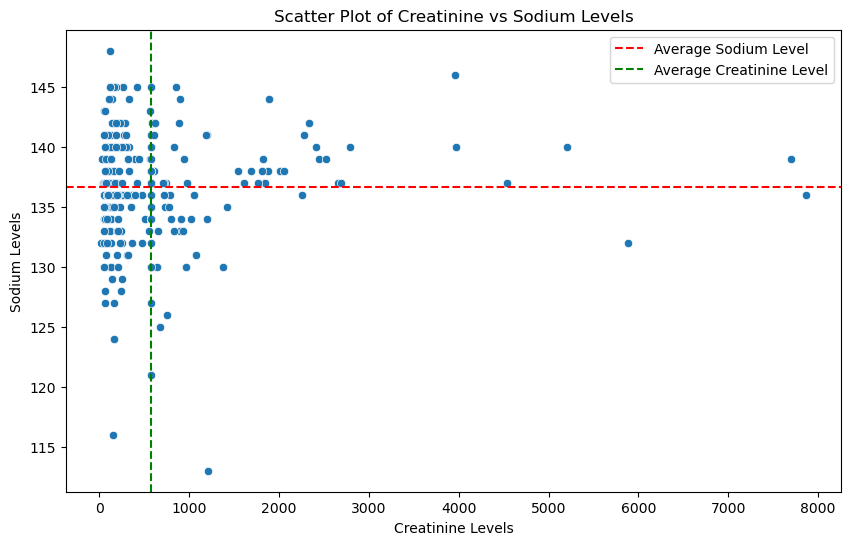

In [42]:
correlation = df['creatinine_phosphokinase'].corr(df['serum_sodium'])
print(f"Correlation coefficient between creatinine and sodium levels: {correlation:.2f}")

# Visualizing the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='creatinine_phosphokinase', y='serum_sodium', data=df)
plt.title('Scatter Plot of Creatinine vs Sodium Levels')
plt.xlabel('Creatinine Levels')
plt.ylabel('Sodium Levels')
plt.axhline(y=df['serum_sodium'].mean(), color='r', linestyle='--', label='Average Sodium Level')
plt.axvline(x=df['creatinine_phosphokinase'].mean(), color='g', linestyle='--', label='Average Creatinine Level')
plt.legend()
plt.show()

##### 6) How does the prevalence of high blood pressure differ between male and female patients?


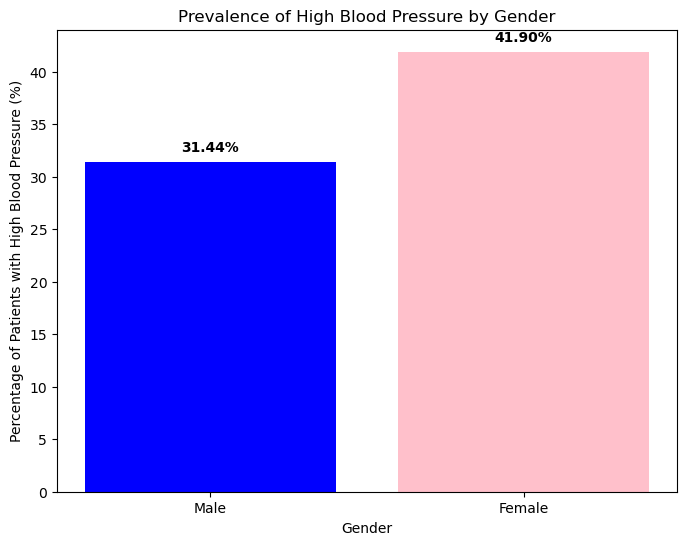

In [49]:
# Calculate the percentage of males and females with high blood pressure
male_hbp_percentage = df[df['sex'] == 1]['high_blood_pressure'].mean() * 100
female_hbp_percentage = df[df['sex'] == 0]['high_blood_pressure'].mean() * 100

# Data for plotting
labels = ['Male', 'Female']
percentages = [male_hbp_percentage, female_hbp_percentage]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['blue', 'pink'])
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Patients with High Blood Pressure (%)')

# Adding percentage labels on top of the bars
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()


##### 7) What is the relationship between smoking habits and the occurrence of heart failure?


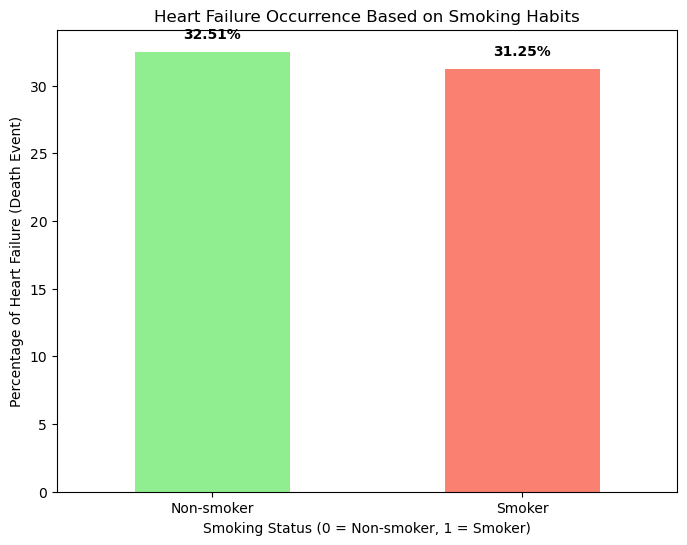

In [50]:
smoking_heart_failure = df.groupby('smoking')['DEATH_EVENT'].mean() * 100

# Plotting the bar chart to visualize the relationship
plt.figure(figsize=(8, 6))
smoking_heart_failure.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Heart Failure Occurrence Based on Smoking Habits')
plt.xlabel('Smoking Status (0 = Non-smoker, 1 = Smoker)')
plt.ylabel('Percentage of Heart Failure (Death Event)')
plt.xticks([0, 1], ['Non-smoker', 'Smoker'], rotation=0)

# Adding percentage labels on top of the bars
for i, v in enumerate(smoking_heart_failure):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

##### 8) Are there any noticeable patterns in the distribution of death events across different age groups?


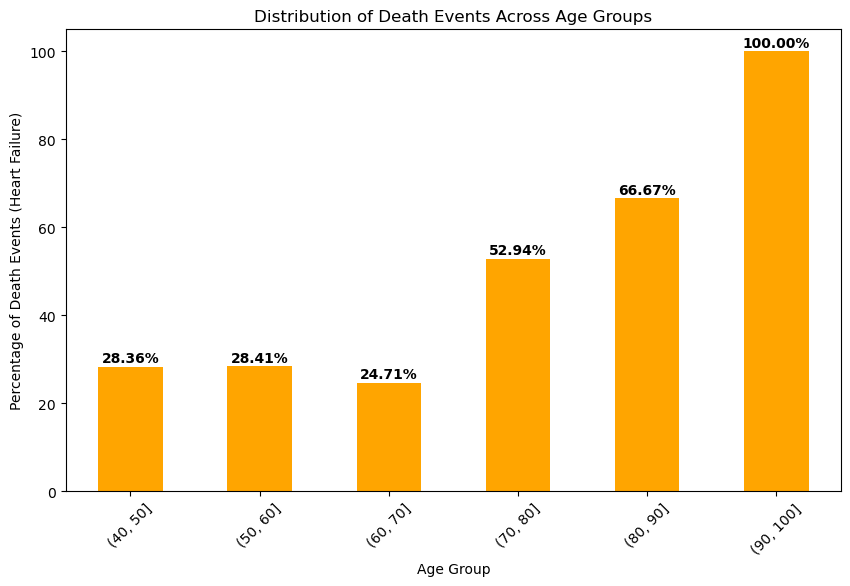

In [51]:
death_events_by_age = df.groupby('age_group')['DEATH_EVENT'].mean() * 100

# Plotting the distribution of death events across different age groups
plt.figure(figsize=(10, 6))
death_events_by_age.plot(kind='bar', color='orange')
plt.title('Distribution of Death Events Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Death Events (Heart Failure)')
plt.xticks(rotation=45)

# Adding percentage labels on top of the bars
for i, v in enumerate(death_events_by_age):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

##### 9) Is there any significant difference in ejection fraction between patients with and without diabetes?


Mean Ejection Fraction (with Diabetes): 38.02
Mean Ejection Fraction (without Diabetes): 38.13
T-test Statistic: -0.08, P-value: 0.9334


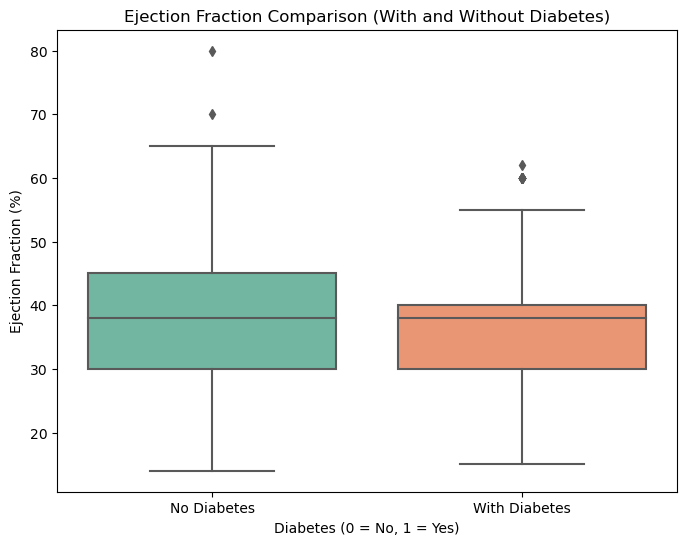

In [54]:
# Descriptive statistics of ejection fraction for patients with and without diabetes
ejection_fraction_with_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ejection_fraction_without_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

mean_with_diabetes = ejection_fraction_with_diabetes.mean()
mean_without_diabetes = ejection_fraction_without_diabetes.mean()

print(f"Mean Ejection Fraction (with Diabetes): {mean_with_diabetes:.2f}")
print(f"Mean Ejection Fraction (without Diabetes): {mean_without_diabetes:.2f}")

# Perform an independent t-test to check for statistical significance
t_stat, p_value = ttest_ind(ejection_fraction_with_diabetes, ejection_fraction_without_diabetes)
print(f"T-test Statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Visualizing with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df, palette='Set2')
plt.title('Ejection Fraction Comparison (With and Without Diabetes)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Ejection Fraction (%)')
plt.xticks([0, 1], ['No Diabetes', 'With Diabetes'])

plt.show()

##### 10) How does the serum creatinine level vary between patients who survived and those who did not?

Mean Serum Creatinine (Survived): 1.18
Mean Serum Creatinine (Not Survived): 1.84
T-test Statistic: -5.31, P-value: 0.0000


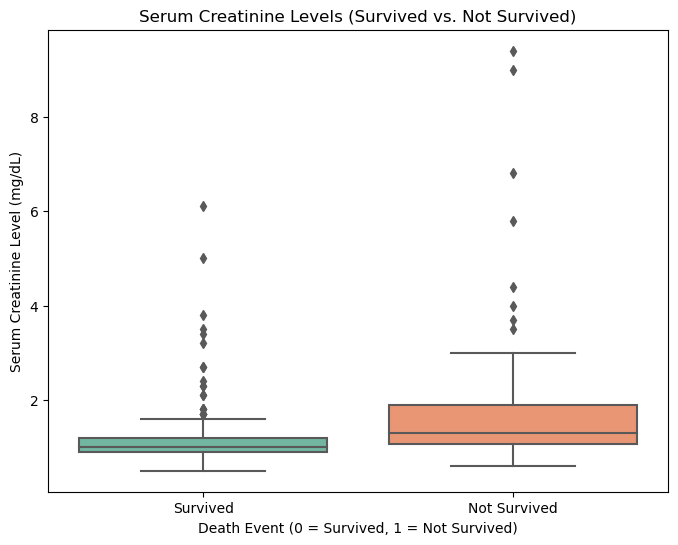

In [55]:
# Descriptive statistics for serum creatinine levels for survivors and non-survivors
creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

mean_survived = creatinine_survived.mean()
mean_not_survived = creatinine_not_survived.mean()

print(f"Mean Serum Creatinine (Survived): {mean_survived:.2f}")
print(f"Mean Serum Creatinine (Not Survived): {mean_not_survived:.2f}")

# Perform an independent t-test to check for statistical significance
t_stat, p_value = ttest_ind(creatinine_survived, creatinine_not_survived)
print(f"T-test Statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Visualizing with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, palette='Set2')
plt.title('Serum Creatinine Levels (Survived vs. Not Survived)')
plt.xlabel('Death Event (0 = Survived, 1 = Not Survived)')
plt.ylabel('Serum Creatinine Level (mg/dL)')
plt.xticks([0, 1], ['Survived', 'Not Survived'])

plt.show()